# Polygenic scores I

> **Important notes for this notebook**
>
> Polygenic scores (PRS) estimate an individual’s genetic predisposition
> to complex traits or diseases by combining information from multiple
> genetic variants previously identified in the GWAS study. This
> notebook provides a step-by-step guide to performing a basic PRS
> analysis using [PRSice](https://choishingwan.github.io/PRSice/) and
> explains how to interpret the results.
>
> ## Learning outcomes
>
> -   **Discuss and choose** the PRS equation
> -   **Discuss** PRS scores and biases
>
> ## How to make this notebook work
>
> -   In this notebook, we will only use the `bash command line`. Be
>     sure to click on the menu `Kernel --> Change Kernel --> Bash`
>
> <img src="Images/bash.png" alt="Bash" width="80"> Choose the Bash
> kernel

While most individual associations found in GWAS studies are of small
effect, information about them can be combined across the genome, to
create a **polygenic score (PGS)**. These scores can be used to make
**genome-based predictions about the overall risk of having a particular
trait or disease or about the genetic value for continuous traits**. If
the prediction is on a discrete phenotype such as a disease, these
scores are known as polygenic risk scores (PRS).

## Polygenic risk prediction analyses

Single-variant association analysis has been the foundation of GWAS.
However, detecting more than a handful of significant SNPs for many
complex traits requires extremely large sample sizes. In contrast, PGS
aggregate genetic risk across multiple variants into a single polygenic
score for a given trait.

A PGS is typically calculated by summing the allele frequencies of
statistically significant trait-associated variants, weighted by their
effect sizes, while ensuring independence among them (e.g., via LD
pruning). These effect sizes—betas for continuous traits and log odds
ratios for binary traits—are obtained from a discovery GWAS. Large
discovery samples (also known as base or training samples) are needed
for accurate estimates, but if the target sample shares ancestry, effect
sizes from larger studies can be leveraged. A target sample of ~2,000
individuals may be sufficient to detect meaningful genetic contributions
to trait variance (Dudbridge 2013). For many complex traits, SNP effect
sizes are publicly available (e.g., see
https://www.nealelab.is/uk-biobank,
https://www.med.unc.edu/pgc/downloads or https://www.ebi.ac.uk/gwas/).

A common practice to calculate PRS involves clumping GWAS results using
p-value thresholds (e.g., p \< 0.05) to exclude poorly associated SNPs.
Usually, multiple PRS analyses will be performed, with varying
thresholds for the p-values of the association test.

Once PRS are calculated, they are used in (logistic) regression models
to assess the contribution to the trait variance. Prediction accuracy is
measured by the increase in $R^2$, comparing a baseline model with only
covariates (e.g., MDS components) to a model that also includes PRS.
This increase reflects the proportion of variance explained by genetic
risk factors. Accuracy depends on trait heritability, SNP count, and
discovery sample size, with a few thousand individuals typically
sufficient for reliable estimates.

## Polygenic risk score analysis with PRSice-2

[PRSice](https://choishingwan.github.io/PRSice/) is a widely used tool
for polygenic risk score analysis. This tutorial offers a step-by-step
guide on its use and result interpretation.

The installed package will include an R script that is straightforward
to run. It requires the following information:

-   `--prsice`: the binary executable file
-   `--base`: the `.assoc` file that contains statistical information
-   `--target`: the PLINK-formatted dataset

> **Note**
>
> We would apply this method to our HapMap dataset, but PRS analysis
> typically requires a sample size of around 2,000 to produce meaningful
> results, while our dataset includes only about 150 individuals. To
> facilitate learning, we will instead use a toy dataset. In this
> notebook, we will focus on analyzing a **binary trait**.
>
> Ideally, the summary statistics should come from the most powerful
> GWAS available for the phenotype of interest. Commonly, the target
> dataset is typically generated within your lab or obtained through
> collaborations.

### PRSice analysis for binary traits

<img src="Images/bash.png" alt="Bash" width="40"> Let’s create a folder
for the output files. Then, perform the PRS analysis on the toy dataset
in the following way:

In [24]:
mkdir -p Results/GWAS6

# Create two links to data
ln -sf ../Data

We will run the `PRSice.R` script using the association test results
(`TOY_BASE_GWAS.assoc`) and specify the column names for SNPs,
chromosomes, and other relevant data. This is necessary because
different association tools generate varying header formats. Finally, we
will specify the location of our data (`TOY_TARGET_DATA`) and define the
phenotype format as binary (0s and 1s).

> **Warning**
>
> If you get an error in the following command, try to restart the
> kernel in the `Kernel` menu. Sometimes links to folders are not
> recognized immediately.

In [4]:
# Recommendation: check the usage instructions and mandatory input files by uncommenting the command below:  
# PRSice -h

SNP CHR BP A1 A2 P OR
SNP_22857 4 103593179 1 2 0.2852 13.29
SNP_13879 2 237416793 1 2 0.8784 21.624
SNP_20771 4 16957461 1 2 0.1994 91.265
SNP_13787 2 235355721 1 2 0.7234 3.178
SNP_25383 4 189927377 1 2 0.3309 3.167
SNP_25290 4 187995996 1 2 0.6327 0.427
SNP_21478 4 40161304 1 2 0.06454 5.066
SNP_12129 2 176643771 1 2 0.9378 1.276
SNP_22809 4 101441465 1 2 0.8111 0.004

In [27]:
PRSice --base ./Data/TOY_BASE_GWAS.assoc \
--snp SNP --chr CHR --bp BP --A1 A1 --A2 A2 --stat OR --pvalue P \
--target ./Data/TOY_TARGET_DATA \
--out Results/GWAS6/PRSice \
--binary-target T 

Trying to install data.table in ./lib
Cannot install data.table, will fall back and use read.table instead
Note: It will be slower when reading large files
PRSice 2.3.3 (2020-08-05) 
https://github.com/choishingwan/PRSice
(C) 2016-2020 Shing Wan (Sam) Choi and Paul F. O'Reilly
GNU General Public License v3
If you use PRSice in any published work, please cite:
Choi SW, O'Reilly PF.
PRSice-2: Polygenic Risk Score Software for Biobank-Scale Data.
GigaScience 8, no. 7 (July 1, 2019)
2025-02-05 14:59:15
./Software/PRSice \
    --a1 A1 \
    --a2 A2 \
    --bar-levels 0.001,0.05,0.1,0.2,0.3,0.4,0.5,1 \
    --base ./Data/TOY_BASE_GWAS.assoc \
    --binary-target T \
    --bp BP \
    --chr CHR \
    --clump-kb 250kb \
    --clump-p 1.000000 \
    --clump-r2 0.100000 \
    --interval 5e-05 \
    --lower 5e-08 \
    --num-auto 22 \
    --or  \
    --out Results/GWAS6/PRSice \
    --pvalue P \
    --seed 173747611 \
    --snp SNP \
    --stat OR \
    --target ./Data/TOY_TARGET_DATA \
    --thre

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)


Clumping Progress: 62.23%

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)


Processing 100.00%
There are 1 region(s) with p-value less than 1e-5. Please 
note that these results are inflated due to the overfitting 
inherent in finding the best-fit PRS (but it's still best 
to find the best-fit PRS!). 
You can use the --perm option (see manual) to calculate an 
empirical P-value. 

Begin plotting
Current Rscript version = 4.3.2
Plotting Bar Plot
Plotting the high resolution plot


-   The `--base` parameter refers to the file with summary statistics
    from the base sample. Each line represents a single SNP and includes
    details such as effect size and p-value.
-   The `--target` parameter specifies the prefix of genotype data files
    in binary PLINK format (.bed, .bim, .fam). The base and target
    samples must be independent to avoid inflated polygenic risk score
    associations.

If the type effect (`--stat`) or data type (`--binary-target`) were not
specified, PRSice will try to determine this information based on the
header of the base file.

> **Stop - Read - Solve**
>
> -   Can all genomic variants be used for calculating PRS? Why or why
>     not?
> -   How can you determine which variants should be included in the PRS
>     calculation?
> -   Are linkage disequilibrium (LD) blocks shared across populations
>     with different ancestry? Explain your reasoning.
>
> Hint: read the \[PRSice user
> manual\](https://choishingwan.github.io/PRSice/step_by_step and Berisa
> and Pickrell (2016).

> **Solution**
>
> -   No, not all variants should be used. Variants in high LD (highly
>     correlated) should be handled carefully to avoid inflated
>     significance and false positives.
> -   Variants should be selected based on their association with the
>     trait and their independence from other variants. Two common
>     approaches for handling correlated SNPs are: - LD clumping (e.g.,
>     [PRSice](https://choishingwan.github.io/PRSice/step_by_step/#clumping)):
>     correlated SNPs within each LD block are filtered by selecting the
>     one with the lowest p-value from the discovery set. Other SNPs in
>     the same block are excluded. Clumping parameters can be
>     customized. - Bayesian adjustments (e.g., [LD
>     Pred2](https://choishingwan.github.io/PRS-Tutorial/ldpred/)) use a
>     Bayesian framework to adjust the effect sizes of SNPs by
>     accounting for LD patterns across the genome. This helps refine
>     PRS calculations and corrects for correlated SNPs.
> -   No, LD blocks can differ between populations of different ancestry
>     due to genetic history and environment. It is essential to account
>     for these differences when calculating PRS, especially when using
>     cross-population data.

For simplicity’s sake, we did not include principal components or
covariates in this analysis, however, when conducting your analyses we
**strongly recommend** including these.

### Interpreting the results

By default, PRSice saves two plots and several text files. The first
plot is `PRSice_BARPLOT_<date>.png`(**which you find in Result/GWAS6
using the file browser**, the filename depends on the current date).
This plot illustrates the predictive value (Nagelkerke’s R²) in the
target sample based on SNPs with p-values below specific thresholds in
the base sample. A p-value is also provided for each model.

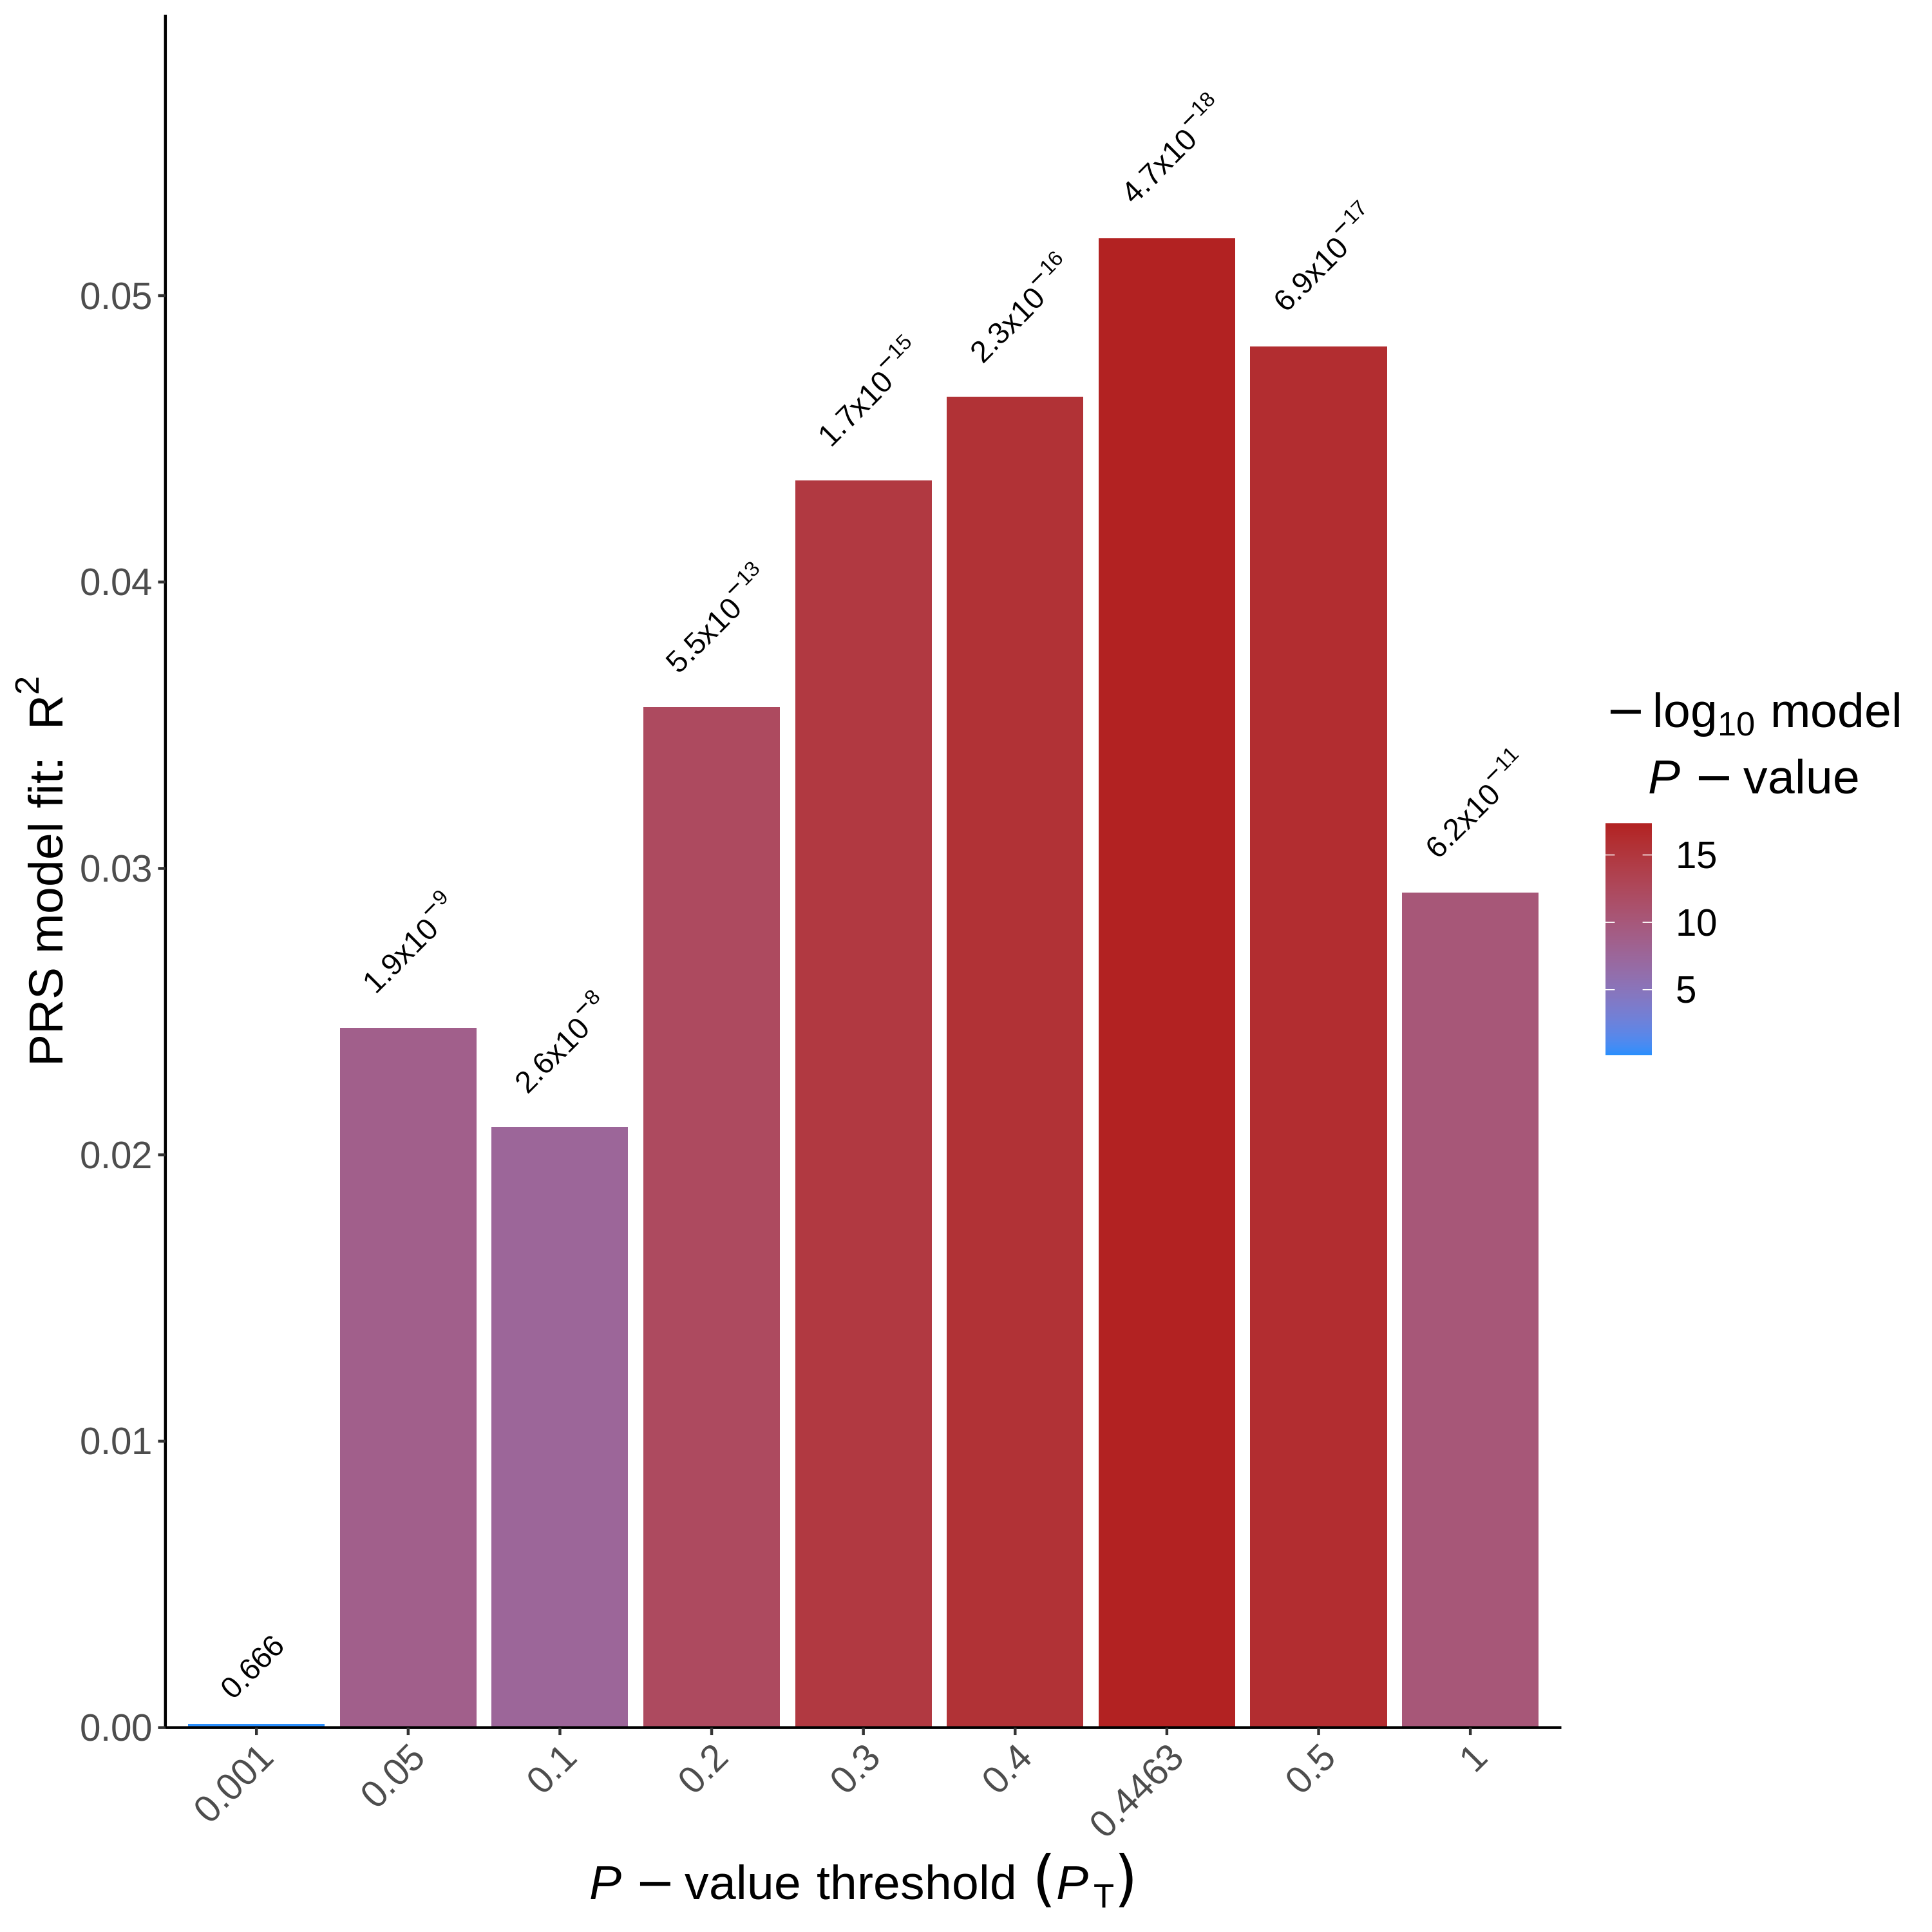

> **Stop - Read - Solve**
>
> -   Which P-value threshold generated the “best-fit” PRS?
> -   How much phenotypic variation does the “best-fit” PRS explain?
>
> Hint: Check the `PRSice.summary` file.

> **Solution**
>
> As shown in the plot, a model using SNPs with a p-value \< 0.4463
> achieves the highest predictive value in the target sample (p-value=
> 4.7e-18). However, as is often the case in polygenic risk scores
> analysis with relatively small samples, the predictive value is
> relatively low (Nagelkerke’s around 5%). The text files include the
> exact values for each p-value threshold (check them!).
>
> The phenotypic variation (`PRS.R2`) explained by these variants is
> 0.05.
>
> -   PRS.R2: quantifies how much of the trait variation is attributable
>     to the genetic variants used in the analysis
> -   Full.R2: represents the total variance explained by the full model
>     (genetic variants and any other covariates used)
> -   Null.R3: indicates the variance explained by the model without the
>     PRS component (i.e., just the covariates)

The second plot `PRSice_HIGH-RES_PLOT_<date>.png` (**which you again can
manually open**) shows many different p-value thresholds. The p-value of
the predictive effect is in black together with an aggregated trend line
in green.

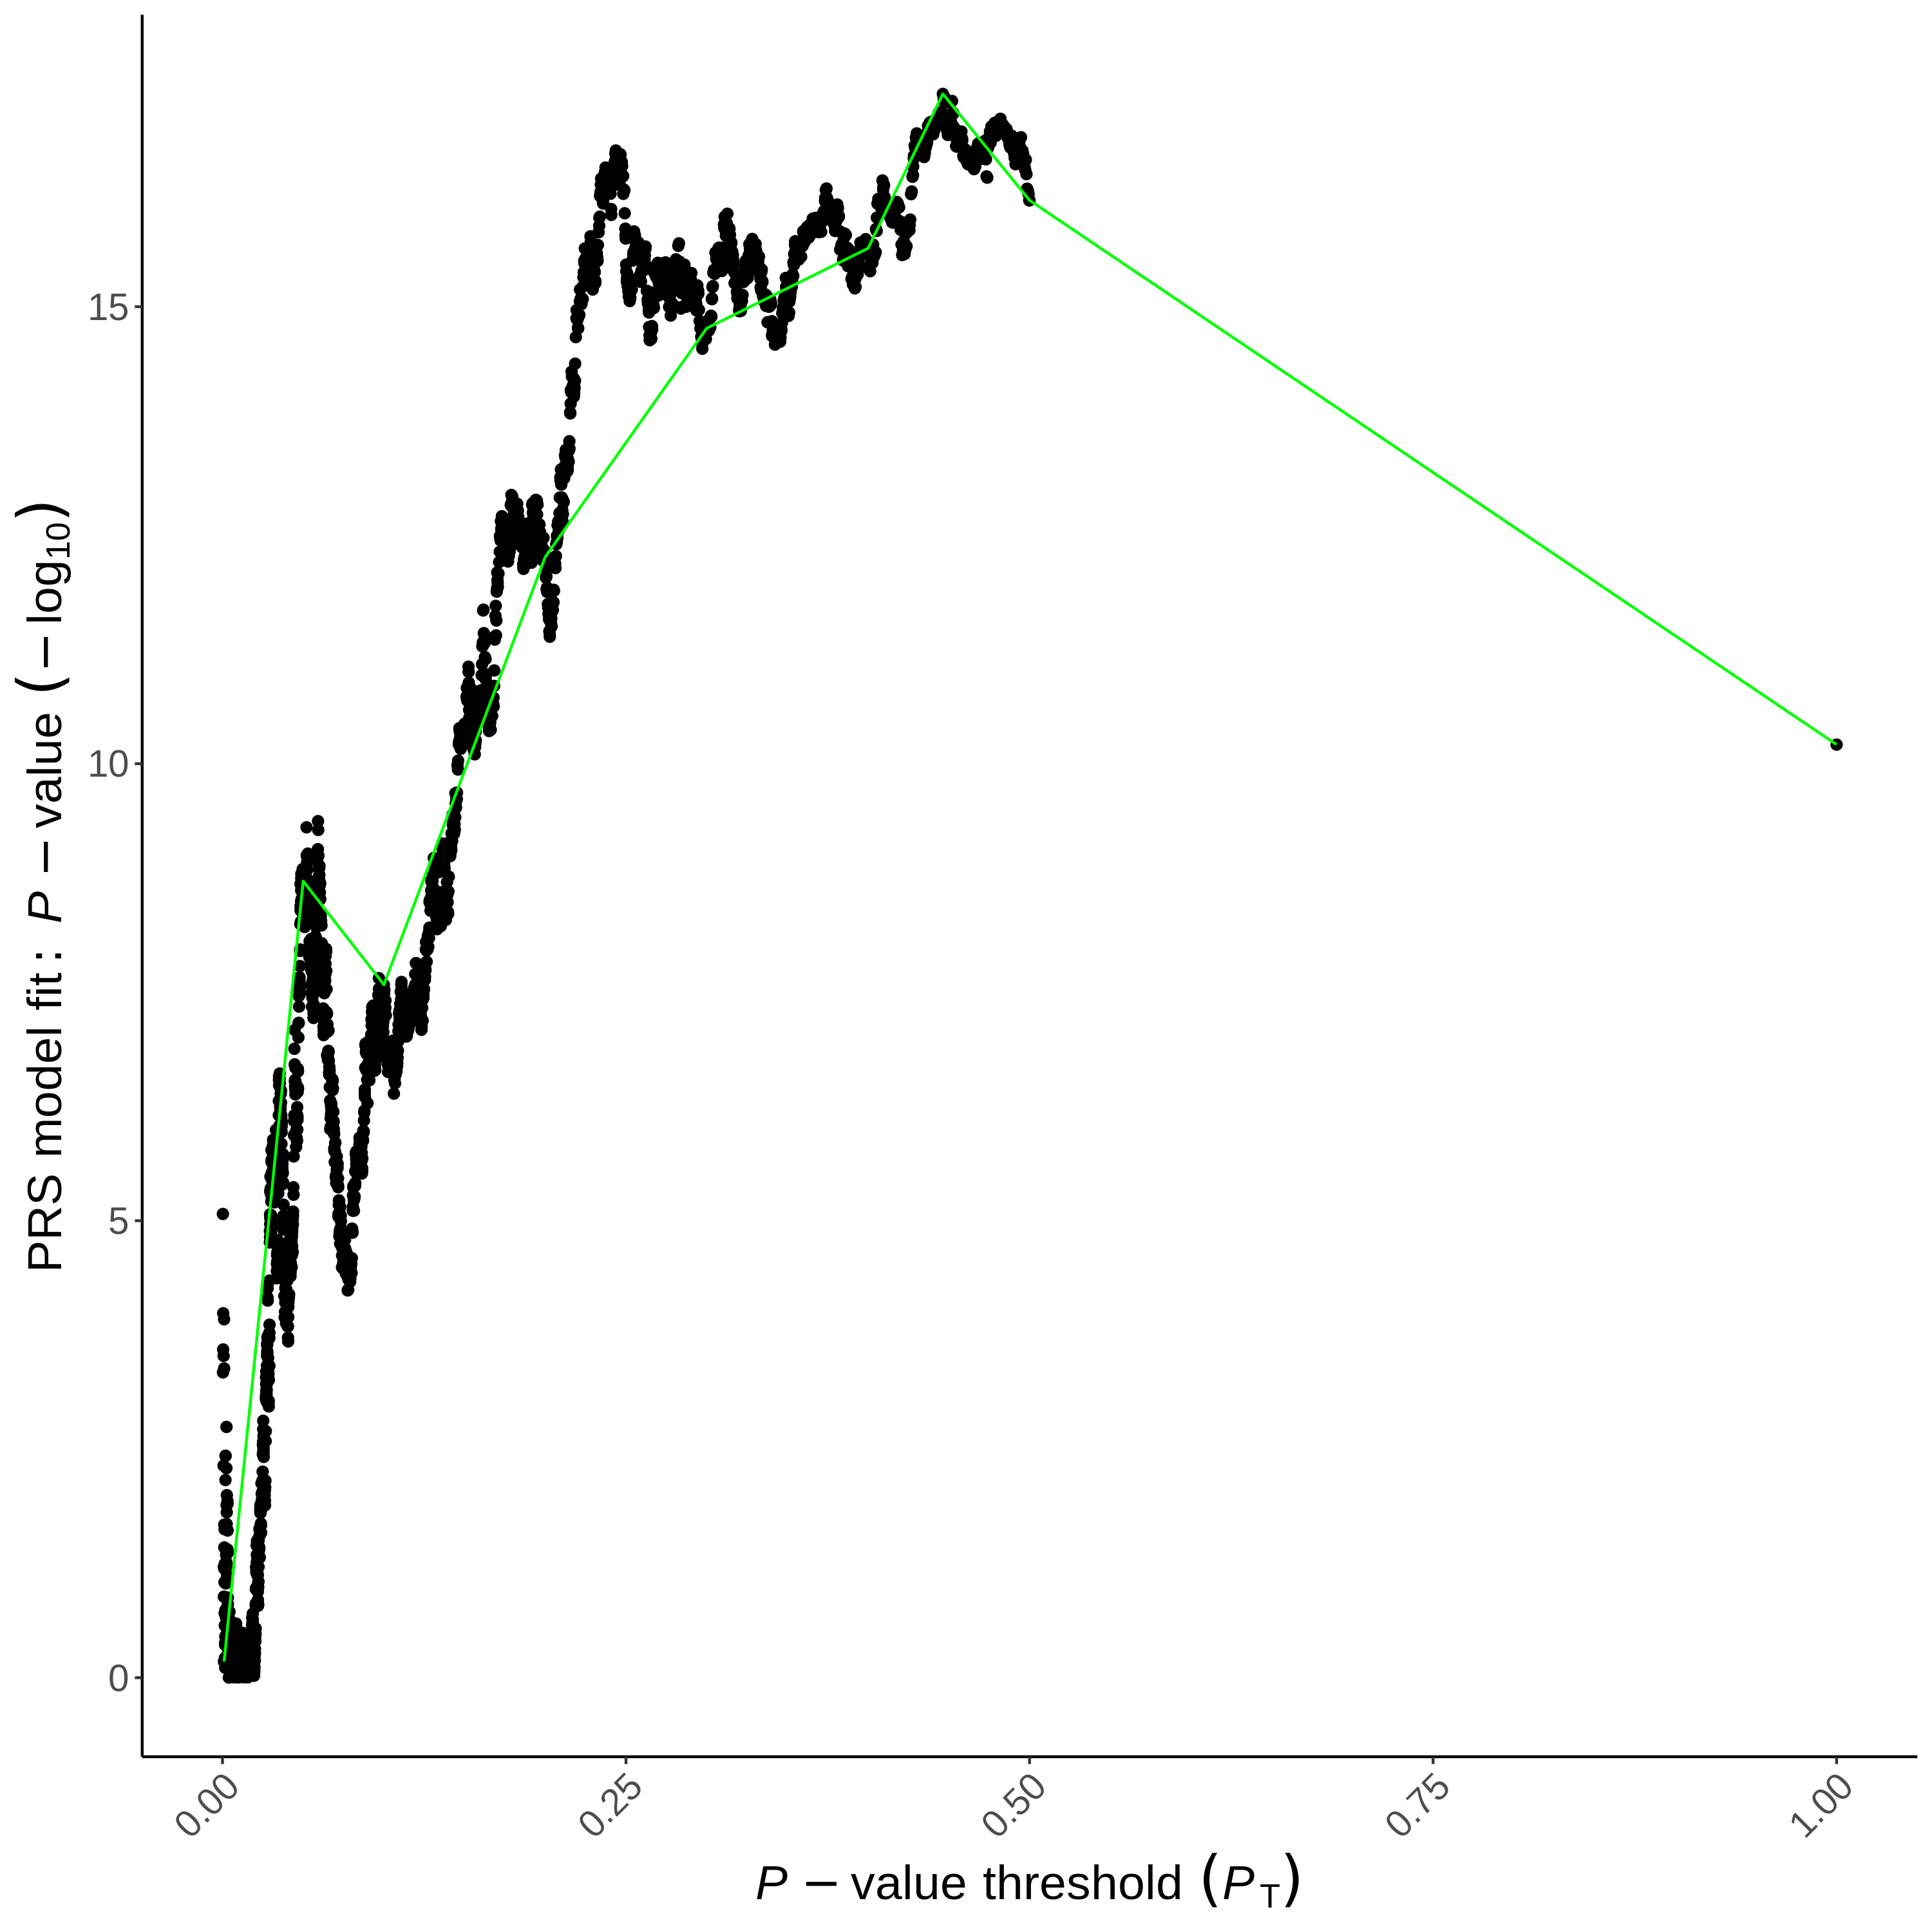

Both figures show that trait-associated SNPs in the base sample can
predict the trait in the target sample. If the same trait is used,
predictive power depends on the trait’s heritability and base sample
size. When using related but different traits, the predictive power also
depends on their genetic correlation. Studies suggest that models with
more lenient p-value thresholds capture smaller effects important for
complex traits, while stricter thresholds reduce noise, aiding
interpretation and the understanding of the underlying genetic
architecture. Balancing informative SNPs and minimizing noise is key to
maximizing predictive power.

### Conclusion

In this tutorial, we have discussed how to perform a simple polygenic
risk score analysis using the PRSice script and interpret its results.
As mentioned before, PRSice offers many additional options to adjust the
risk score analysis, including adding covariates (principal components)
and adjusting clumping parameters. It is recommended to read the user
manual of PRSice to perform a polygenic risk score analysis optimal to
the research question at hand.

Now, you will need to do the same for a quantitative trait and explore
the results.

> **Other take-home messages**
>
> -   Replication in (several) other cohorts provides convincing
>     evidence
> -   Applying stringent statistics (P\<5e-8) helps to reduce the
>     likelihood of false-positive results
> -   An external reference panel can be used to improve LD estimation
>     for clumping, providing more accurate definitions of LD blocks and
>     refining the selection of variants for PRS analysis, especially
>     when sample size is limited (e.g. ~500 samples).

## Further Reading

There is only so much one can discuss in a beginner’s practical guide to
GWAS. As such, for those who want to expand their knowledge of GWAS, we
have provided a comprehensive list of resources for you to read/try out
below.

Berisa, Tomaz, and Joseph K Pickrell. 2016. “Approximately Independent
Linkage Disequilibrium Blocks in Human Populations.” *Bioinformatics* 32
(2): 283.

Dudbridge, Frank. 2013. “Power and Predictive Accuracy of Polygenic Risk
Scores.” *PLoS Genetics* 9 (3): e1003348.